<a href="https://colab.research.google.com/github/mpsdecamargo/ml-data-science-portfolio/blob/main/adult-income-classification/Adult_Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

This is a small project based on binary classification on an imbalanced dataset. I decided to do it in order to learn and practice my skills by following a tutorial and complementing it based on new methods I learned(Hyperparameter Tuning and Cross-Validation).

Note: I know the level of steps taken, such as the Hyperparameter Tuning steps may be overkill for this small dataset, but my purpose was to practice for my next projects.

# PROBLEM DEFINITION

In this machine learning portfolio project, the focus is on predicting adult income levels based on various demographic and employment-related features. The project involves addressing challenges related to data cleaning and handling imbalanced datasets to build a robust income prediction model.

The primary goal of the Adult Income Prediction project is to develop a machine learning model capable of predicting whether an adult's income exceeds a certain threshold, given a set of features such as age, education, occupation, and more. The prediction of income levels is essential for understanding socioeconomic factors and tailoring public policies accordingly.

# ABOUT THE DATASET

In this project, we will use a standard imbalanced machine learning dataset referred to as the “Adult Income” or simply the “adult” dataset.

The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

— Scaling Up The Accuracy Of Naive-bayes Classifiers: A Decision-tree Hybrid, 1996.

The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

Age.

Workclass.

Final Weight.

Education.

Education Number of Years.

Marital-status.

Occupation.

Relationship.

Race.

Sex.

Capital-gain.

Capital-loss.

Hours-per-week.

Native-country.

The dataset contains missing values that are marked with a question mark character (?).

There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows.

There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

‘>50K’: majority class, approximately 25%.
‘<=50K’: minority class, approximately 75%.
Given that the class imbalance is not severe and that both class labels are equally important, it is common to use classification accuracy or classification error to report model performance on this dataset.

Source: https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/

# IMPORTING AND EXPLORATORY DATA ANALYSIS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint as sp_randint, uniform as sp_uniform
from sklearn.metrics import accuracy_score, f1_score, make_scorer


In [ ]:
col_names = ["Age","Workclass","Final Weight","Education","Education Number of Years","Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country","target"]
df = pd.read_csv('https://raw.githubusercontent.com/mpsdecamargo/ml-data-science-portfolio/main/adult-income-classification/dataset/adult-income-dataset.csv',na_values="?", index_col=False, header=None, names=col_names)
df.head()

ParserError: ignored

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        48842 non-null  int64 
 1   Workclass                  46043 non-null  object
 2   Final Weight               48842 non-null  int64 
 3   Education                  48842 non-null  object
 4   Education Number of Years  48842 non-null  int64 
 5   Marital-status             48842 non-null  object
 6   Occupation                 46033 non-null  object
 7   Relationship               48842 non-null  object
 8   Race                       48842 non-null  object
 9   Sex                        48842 non-null  object
 10  Capital-gain               48842 non-null  int64 
 11  Capital-loss               48842 non-null  int64 
 12  Hours-per-week             48842 non-null  int64 
 13  Native-country             47985 non-null  object
 14  target

In [ ]:
df.nunique()

Age                             74
Workclass                        8
Final Weight                 28523
Education                       16
Education Number of Years       16
Marital-status                   7
Occupation                      14
Relationship                     6
Race                             5
Sex                              2
Capital-gain                   123
Capital-loss                    99
Hours-per-week                  96
Native-country                  41
target                           2
dtype: int64

In [ ]:
df.describe()

,Age,Final Weight,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
for col in df.columns:
  print(col)
  if df[col].dtype == "object":
    print(df[col].unique())

Age
Workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Final Weight
Education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Education Number of Years
Marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Sex
['Male' 'Female']
Capital-gain
Capital-loss
Hours-per-week
Native-country
['United-States' 'Cuba' 

In [ ]:
df.isna().sum()

Age                             0
Workclass                    2799
Final Weight                    0
Education                       0
Education Number of Years       0
Marital-status                  0
Occupation                   2809
Relationship                    0
Race                            0
Sex                             0
Capital-gain                    0
Capital-loss                    0
Hours-per-week                  0
Native-country                857
target                          0
dtype: int64

In [ ]:
df_filtered = df.dropna()

In [ ]:
df_filtered.shape

(45222, 15)

In [ ]:
counter = df_filtered["target"].value_counts()
print(counter)

print(f"Percentage: {(counter[0]/len(df_filtered)*100):.3f}%")
print(f"Percentage: {(counter[1]/len(df_filtered)*100):.3f}%")

<=50K    34014
>50K     11208
Name: target, dtype: int64
Percentage: 75.216%
Percentage: 24.784%


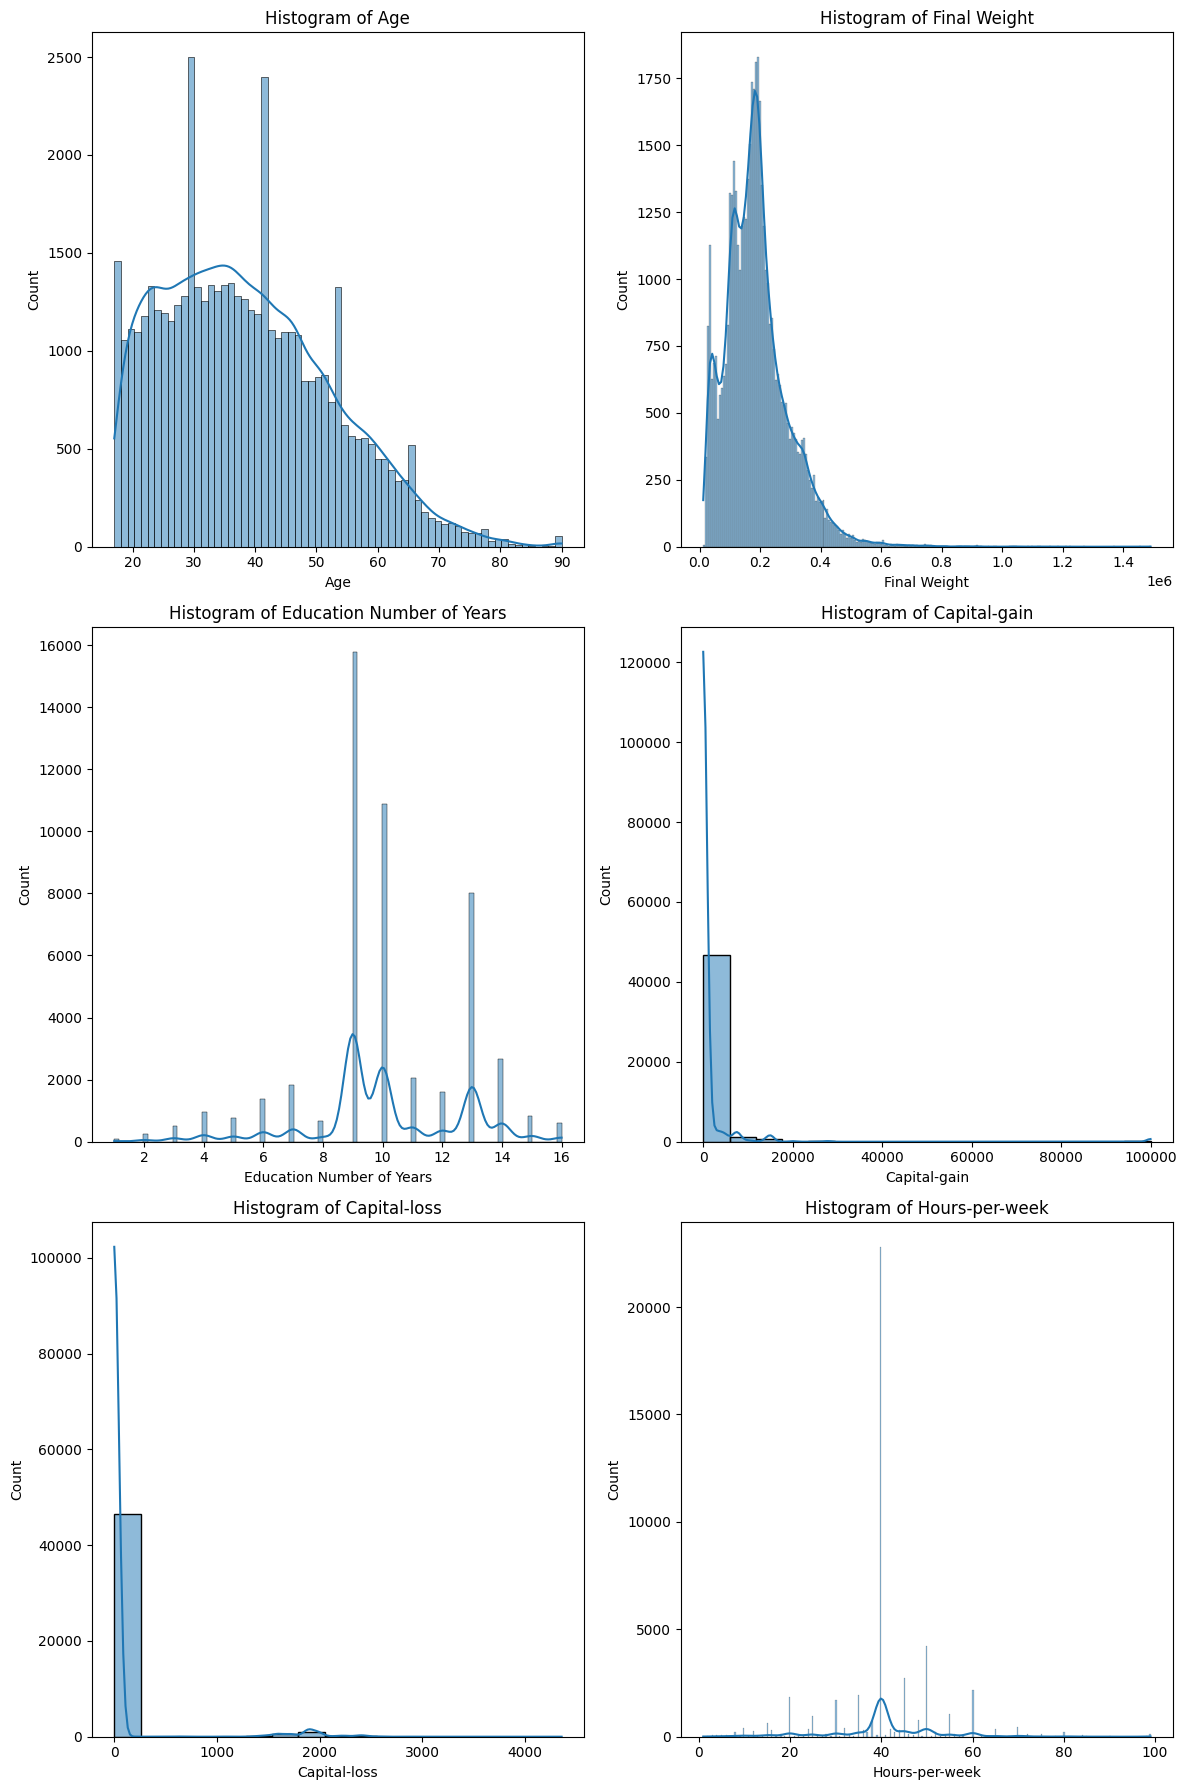

In [ ]:
numerical_columns = df_filtered.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(nrows=(len(numerical_columns) + 1) // 2, ncols=2, figsize=(12, 6 * ((len(numerical_columns) + 1) // 2)))

# Plot histograms for each numeric column
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df_filtered.corr()

<ipython-input-54-3b1745aa73cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtered.corr()


,Age,Final Weight,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
Final Weight,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
Education Number of Years,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
Capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
Capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
Hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


The data analysis was concluded. It was necessary to drop the missing values for the next stage which is model training. Also, the dataset is imbalanced which changes how the next steps must be done. It was possible to resample so the target label classes would be balanced(considering it is a small dataset), but my choice was to do cross-validation instead for the purpose of practicing this skill and reducing overfitting. By looking at the Pearson correlation matrix, it was possible to check that there were no two features with a high level of multicolinearity (below 0.15), not considering the correlation with the target variable.

# MODEL TRAINING AND EVALUATION

In [ ]:
df_filtered = df.copy()
df_filtered["target"] = df_filtered["target"].map({">50K": 1, "<=50K": 0})

In [ ]:
X = df_filtered.drop("target", axis=1)
y = df_filtered["target"]

In [ ]:
X.head()

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64']).columns

categorical_transformer = OneHotEncoder(drop='first', sparse=False)
numerical_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ]
)

# Create a pipeline with the column transformer
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the transformations to X_transformed
X_transformed = pipeline.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Establishing a Baseline

In [ ]:
baseline = DummyClassifier(strategy="most_frequent")

# StratifiedKFold with 10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score)
}

cross_val_scores = cross_validate(baseline, X_transformed, y, cv=stratified_kfold, scoring=scoring_metrics)

print(f"Mean Baseline Accuracy Score: {cross_val_scores['test_accuracy'].mean()*100:.2f}%")
print(f"Mean Baseline F1 Score: {cross_val_scores['test_f1'].mean()*100:.2f}%")

Mean Baseline Accuracy Score: 76.07%
Mean Baseline F1 Score: 0.00%


Initial Model Assessment

In [ ]:
models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=50),
    XGBClassifier(n_estimators=100),
    LGBMClassifier(n_estimators=100,verbosity=0),
    GradientBoostingClassifier()
]

results = []

for model in models:
  scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score)
  }
  start_time = time.time()
  cross_val_scores = cross_validate(model, X_transformed, y, cv=stratified_kfold, scoring=scoring_metrics)
  end_time = time.time()

  # Evaluate model, print and save results
  acc_score_mean = cross_val_scores['test_accuracy'].mean()*100
  f1_score_mean = cross_val_scores['test_f1'].mean()*100
  training_time = end_time - start_time
  result = []
  result = [model.__class__.__name__, f"{acc_score_mean:.2f}", f"{f1_score_mean:.2f}", training_time]
  results.append(result)
  print(f"Model: {model}")
  print(f"Mean Baseline Accuracy Score: {(acc_score_mean):.2f}%")
  print(f"Mean Baseline F1 Score: {(f1_score_mean):.2f}%")
  print(f"Training time for {type(model).__name__}: {training_time:.4f} seconds")



Model: LogisticRegression(max_iter=1000)
Mean Baseline Accuracy Score: 85.16%
Mean Baseline F1 Score: 65.74%
Training time for LogisticRegression: 40.1539 seconds
Model: KNeighborsClassifier()
Mean Baseline Accuracy Score: 82.41%
Mean Baseline F1 Score: 60.71%
Training time for KNeighborsClassifier: 29.8137 seconds
Model: RandomForestClassifier()
Mean Baseline Accuracy Score: 85.53%
Mean Baseline F1 Score: 67.27%
Training time for RandomForestClassifier: 84.9319 seconds
Model: AdaBoostClassifier()
Mean Baseline Accuracy Score: 86.12%
Mean Baseline F1 Score: 67.65%
Training time for AdaBoostClassifier: 44.2579 seconds
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interactio

In [ ]:
results

[['LogisticRegression', '85.16', '65.74', 40.15386414527893],
 ['KNeighborsClassifier', '82.41', '60.71', 29.813673734664917],
 ['RandomForestClassifier', '85.53', '67.27', 84.93192028999329],
 ['AdaBoostClassifier', '86.12', '67.65', 44.25787305831909],
 ['XGBClassifier', '87.28', '71.07', 17.087268114089966],
 ['LGBMClassifier', '87.38', '71.20', 7.478071928024292],
 ['GradientBoostingClassifier', '86.73', '68.58', 176.0738341808319]]

The best models for the initial assessment were:


Model: LGBMClassifier

    Mean Baseline Accuracy Score: 87.38%

    Mean Baseline F1 Score: 71.20%

Model: XGBClassifier

    Mean Baseline Accuracy Score: 87.28%

    Mean Baseline F1 Score: 71.07%

Model: GradientBoostingClassifier

    Mean Baseline Accuracy Score: 86.73%

    Mean Baseline F1 Score: 68.58%

Model: AdaBoostClassifier

    Mean Baseline Accuracy Score: 86.12%

    Mean Baseline F1 Score: 67.65%

Model: RandomForestClassifier

    Mean Baseline Accuracy Score: 85.47%

    Mean Baseline F1 Score: 67.14%

Model: LogisticRegression

    Mean Baseline Accuracy Score: 85.16%

    Mean Baseline F1 Score: 65.74%

# Hyperparameter Tuning

In [ ]:
results_random_search = []

def random_search_and_eval(model,param_dist,n_iter):
  X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
  scoring_metrics = {
        'accuracy': 'accuracy',
        'f1': 'f1',
    }
  random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=n_iter,
    cv=3,
    scoring=scoring_metrics,
    refit='f1',
    random_state=42,
    n_jobs=-1
  )
  random_search.fit(X_train, y_train)

  # Evaluate model, print and save results
  print("Best Parameters:", random_search.best_params_)
  print("Best Accuracy:", random_search.best_score_)
  y_pred = random_search.best_estimator_.predict(X_test)
  val_accuracy_score = accuracy_score(y_test, y_pred)
  val_f1_score = f1_score(y_test, y_pred)
  print("Validation Accuracy:", val_accuracy_score)
  print("Validation F1 Score:", val_f1_score)
  result = [model.__class__.__name__, random_search.best_params_, random_search.best_score_, val_accuracy_score, val_f1_score]
  results_random_search.append(result)


In [ ]:
param_dist = {
    'learning_rate': sp_uniform(0.01, 0.1),
    'n_estimators': sp_randint(100, 300),
    'num_leaves': sp_randint(20, 50),
    'max_depth': sp_randint(5, 15),
    'min_child_samples': sp_randint(10, 30),
    'subsample': sp_uniform(0.8, 1.0),
    'colsample_bytree': sp_uniform(0.8, 1.0),
    'reg_alpha': sp_uniform(0.0, 0.5),
    'reg_lambda': sp_uniform(0.0, 0.5)
}

lgb_model = LGBMClassifier(verbosity=0)

n_iter = 100

random_search_and_eval(lgb_model,param_dist,n_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
282 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 255, in train
    bo

Best Parameters: {'colsample_bytree': 0.9366213314420289, 'learning_rate': 0.08089109969101185, 'max_depth': 11, 'min_child_samples': 19, 'n_estimators': 125, 'num_leaves': 22, 'reg_alpha': 0.12810347179722903, 'reg_lambda': 0.30575685543284026, 'subsample': 0.8815941804002404}
Best Accuracy: 0.7117936213156132
Validation Accuracy: 0.8726584092537619
Validation F1 Score: 0.7101584342963653


In [ ]:
param_dist = {
    'learning_rate': sp_uniform(0.01, 0.1),
    'n_estimators': sp_randint(100, 300),
    'max_depth': sp_randint(3, 10),
    'min_child_weight': sp_randint(1, 10),
    'subsample': sp_uniform(0.8, 1.0),
    'colsample_bytree': [0.8],
    'gamma': sp_uniform(0, 0.5),
    'reg_alpha': sp_uniform(0, 0.5),
    'reg_lambda': sp_uniform(0, 0.5),
    'scale_pos_weight': sp_uniform(1, 10),
}

xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

n_iter=200

random_search_and_eval(xgb_model,param_dist,n_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
489 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1515, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 729, in inner_f
 

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.16615731267755446, 'learning_rate': 0.06424786357193675, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 255, 'reg_alpha': 0.09977122546457257, 'reg_lambda': 0.34011412121564566, 'scale_pos_weight': 1.7219840897917584, 'subsample': 0.8306525022058061}
Best Accuracy: 0.7280525613756658
Validation Accuracy: 0.8641621455624936
Validation F1 Score: 0.7311043566362715


In [ ]:
param_dist = {
    'n_estimators': sp_randint(50, 200),
    'learning_rate': sp_uniform(0.01, 0.1),
    'algorithm': ['SAMME', 'SAMME.R'],
    'base_estimator__max_depth': sp_randint(1, 10),
    'base_estimator__min_samples_split': sp_randint(2, 20),
}

base_estimator = DecisionTreeClassifier()

adaboost_model = AdaBoostClassifier(estimator=base_estimator)

n_iter=50

random_search_and_eval(adaboost_model,param_dist,n_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Parameters: {'algorithm': 'SAMME.R', 'base_estimator__max_depth': 6, 'base_estimator__min_samples_split': 6, 'learning_rate': 0.0445071248026683, 'n_estimators': 178}
Best Accuracy: 0.6977571872998558
Validation Accuracy: 0.8719418568942573
Validation F1 Score: 0.7024970273483948


In [ ]:
param_dist = {
    'n_estimators': sp_randint(50, 300),
    'max_depth': sp_randint(1, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

rf_model = RandomForestClassifier()

n_iter=200

random_search_and_eval(rf_model,param_dist,n_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': False, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 245}
Best Accuracy: 0.6401365700114137
Validation Accuracy: 0.8539256832838571
Validation F1 Score: 0.6305979808439036


In [ ]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': sp_uniform(0.01, 10.0),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': sp_randint(100, 500),
}

logreg_model = LogisticRegression()

n_iter=200

random_search_and_eval(logreg_model,param_dist,n_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
282 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Onl

Best Parameters: {'C': 6.144151959357899, 'max_iter': 109, 'penalty': 'none', 'solver': 'lbfgs'}
Best Accuracy: 0.6594732968767587
Validation Accuracy: 0.8511618384686253
Validation F1 Score: 0.6552868658131815


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
param_dist = {
    'learning_rate': sp_uniform(0.01, 0.1),
    'n_estimators': sp_randint(100, 300),
    'max_depth': sp_randint(3, 15),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'subsample': sp_uniform(0.8, 1.0),
    'max_features': sp_uniform(0.8, 1.0)
}

gbm_model = GradientBoostingClassifier()

n_iter = 100

random_search_and_eval(gbm_model, param_dist, n_iter)

In [ ]:
results_random_search

[['LGBMClassifier',
  {'colsample_bytree': 0.9366213314420289,
   'learning_rate': 0.08089109969101185,
   'max_depth': 11,
   'min_child_samples': 19,
   'n_estimators': 125,
   'num_leaves': 22,
   'reg_alpha': 0.12810347179722903,
   'reg_lambda': 0.30575685543284026,
   'subsample': 0.8815941804002404},
  0.7117936213156132,
  0.8726584092537619,
  0.7101584342963653],
 ['XGBClassifier',
  {'colsample_bytree': 0.8,
   'gamma': 0.16615731267755446,
   'learning_rate': 0.06424786357193675,
   'max_depth': 5,
   'min_child_weight': 3,
   'n_estimators': 255,
   'reg_alpha': 0.09977122546457257,
   'reg_lambda': 0.34011412121564566,
   'scale_pos_weight': 1.7219840897917584,
   'subsample': 0.8306525022058061},
  0.7280525613756658,
  0.8641621455624936,
  0.7311043566362715],
 ['AdaBoostClassifier',
  {'algorithm': 'SAMME.R',
   'base_estimator__max_depth': 6,
   'base_estimator__min_samples_split': 6,
   'learning_rate': 0.0445071248026683,
   'n_estimators': 178},
  0.69775718729985

After finding random optimal hyperparameters, it's possible to tune even further using GridSearchCV and the best combination of hyperparameters found during Randomized Search.

In [ ]:
results_grid_search = []

In [ ]:
def grid_search_and_eval(model, param_grid):
  scoring_metrics = {
    'accuracy': 'accuracy',
    'f1': 'f1',
  }

  X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

  # Perform GridSearchCV
  grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_grid,
      cv=3,
      scoring=scoring_metrics,
      refit='f1',
      n_jobs=-1
  )

  # Fit the model to find the best parameters
  grid_search.fit(X_train, y_train)

  # Evaluate model, print and save results
  print("Best Parameters:", grid_search.best_params_)
  print("Best F1 Score:", grid_search.best_score_)
  y_pred = grid_search.best_estimator_.predict(X_test)
  val_accuracy_score = accuracy_score(y_test, y_pred)
  val_f1_score = f1_score(y_test, y_pred)
  print("Validation Accuracy:", val_accuracy_score)
  print("Validation F1 Score:", val_f1_score)
  result = [model.__class__.__name__, grid_search.best_params_, grid_search.best_score_, val_accuracy_score, val_f1_score]
  results_grid_search.append(result)

In [ ]:
adaboost_best_params = {
    'algorithm': 'SAMME.R',
    'base_estimator__max_depth': 6,
    'base_estimator__min_samples_split': 6,
    'learning_rate': 0.0445071248026683,
    'n_estimators': 178,
}

adaboost_param_grid = {
    'algorithm': ['SAMME.R'],
    'base_estimator__max_depth': [adaboost_best_params['base_estimator__max_depth'] - 2, adaboost_best_params['base_estimator__max_depth'], adaboost_best_params['base_estimator__max_depth'] + 2],
    'base_estimator__min_samples_split': [adaboost_best_params['base_estimator__min_samples_split'], adaboost_best_params['base_estimator__min_samples_split'] + 2],
    'learning_rate': [adaboost_best_params['learning_rate'] - 0.01, adaboost_best_params['learning_rate'], adaboost_best_params['learning_rate'] + 0.01],
    'n_estimators': [adaboost_best_params['n_estimators'] - 20, adaboost_best_params['n_estimators'], adaboost_best_params['n_estimators'] + 20],
}

estimator = DecisionTreeClassifier()

adaboost_model = AdaBoostClassifier(estimator=estimator)

grid_search_and_eval(adaboost_model, adaboost_param_grid)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Parameters: {'algorithm': 'SAMME.R', 'base_estimator__max_depth': 4, 'base_estimator__min_samples_split': 6, 'learning_rate': 0.054507124802668304, 'n_estimators': 198}
Best F1 Score: 0.7053402457028229
Validation Accuracy: 0.8723513153854028
Validation F1 Score: 0.7031659128778862


In [ ]:
lgbm_best_params = {
    'colsample_bytree': 0.9366213314420289,
    'learning_rate': 0.08089109969101185,
    'max_depth': 11,
    'min_child_samples': 19,
    'n_estimators': 125,
    'num_leaves': 22,
    'reg_alpha': 0.12810347179722903,
    'reg_lambda': 0.30575685543284026,
    'subsample': 0.8815941804002404,
}

lgbm_param_grid = {
    'learning_rate': [lgbm_best_params['learning_rate'] - 0.02, lgbm_best_params['learning_rate'], lgbm_best_params['learning_rate'] + 0.02],
    'max_depth': [lgbm_best_params['max_depth'], lgbm_best_params['max_depth'] + 2],
    'n_estimators': [lgbm_best_params['n_estimators'] - 20, lgbm_best_params['n_estimators'], lgbm_best_params['n_estimators'] + 20],
    'num_leaves': [lgbm_best_params['num_leaves'] - 5, lgbm_best_params['num_leaves'], lgbm_best_params['num_leaves'] + 5],
    'subsample': [lgbm_best_params['subsample'] - 0.05, lgbm_best_params['subsample'], lgbm_best_params['subsample'] + 0.05],
}


lgbm_model = LGBMClassifier()

grid_search_and_eval(lgbm_model, lgbm_param_grid)

[LightGBM] [Info] Number of positive: 9332, number of negative: 29741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 92
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238835 -> initscore=-1.159077
[LightGBM] [Info] Start training from score -1.159077
Best Parameters: {'learning_rate': 0.08089109969101185, 'max_depth': 11, 'n_estimators': 145, 'num_leaves': 22, 'subsample': 0.8315941804002404}
Best F1 Score: 0.7121634002802063
Validation Accuracy: 0.8728631384993346
Validation F1 Score: 0.7099486221391872


In [ ]:
xgb_best_params = {
    'colsample_bytree': 0.8,
    'gamma': 0.16615731267755446,
    'learning_rate': 0.06424786357193675,
    'max_depth': 5,
    'min_child_weight': 3,
    'n_estimators': 255,
    'reg_alpha': 0.09977122546457257,
    'reg_lambda': 0.34011412121564566,
    'scale_pos_weight': 1.7219840897917584,
    'subsample': 0.8306525022058061,
}
xgb_param_grid = {
    'colsample_bytree': [xgb_best_params['colsample_bytree'] - 0.05, xgb_best_params['colsample_bytree'], xgb_best_params['colsample_bytree'] + 0.05],
    'learning_rate': [xgb_best_params['learning_rate'] - 0.02, xgb_best_params['learning_rate'], xgb_best_params['learning_rate'] + 0.02],
    'max_depth': [xgb_best_params['max_depth'] - 2, xgb_best_params['max_depth'], xgb_best_params['max_depth'] + 2],
    'n_estimators': [xgb_best_params['n_estimators'] - 20, xgb_best_params['n_estimators'], xgb_best_params['n_estimators'] + 20],
    'subsample': [xgb_best_params['subsample'], xgb_best_params['subsample'] + 0.05],
}

xgb_model = XGBClassifier()

grid_search_and_eval(xgb_model, xgb_param_grid)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.06424786357193675, 'max_depth': 7, 'n_estimators': 255, 'subsample': 0.8806525022058062}
Best F1 Score: 0.7135337200114762
Validation Accuracy: 0.8723513153854028
Validation F1 Score: 0.7092562368850548


In [ ]:
best_params = {
    'learning_rate': 0.05338516492379731,
    'max_depth': 9,
    'max_features': 0.8480589241970338,
    'min_samples_leaf': 6,
    'min_samples_split': 6,
    'n_estimators': 199,
    'subsample': 0.8453040097720446
}

gbm_param_grid = {
    'learning_rate': [best_params['learning_rate'] - 0.02, best_params['learning_rate'], best_params['learning_rate'] + 0.02],
    'max_depth': [best_params['max_depth'] - 2, best_params['max_depth'], best_params['max_depth'] + 2],
    'n_estimators':[best_params['n_estimators'] - 20, best_params['n_estimators'], best_params['n_estimators']+20],
    'subsample': [best_params['subsample'], best_params['subsample'] + 0.05]
}

gbm_model = GradientBoostingClassifier()

grid_search_and_eval(gbm_model, gbm_param_grid)

Best Parameters: {'learning_rate': 0.05338516492379731, 'max_depth': 7, 'n_estimators': 179, 'subsample': 0.8953040097720446}
Best F1 Score: 0.7119286423988119
Validation Accuracy: 0.8730678677449074
Validation F1 Score: 0.7105508870214753


In [ ]:
results_grid_search

[['AdaBoostClassifier',
  {'algorithm': 'SAMME.R',
   'base_estimator__max_depth': 4,
   'base_estimator__min_samples_split': 6,
   'learning_rate': 0.054507124802668304,
   'n_estimators': 198},
  0.7053402457028229,
  0.8723513153854028,
  0.7031659128778862],
 ['LGBMClassifier',
  {'learning_rate': 0.08089109969101185,
   'max_depth': 11,
   'n_estimators': 145,
   'num_leaves': 22,
   'subsample': 0.8315941804002404},
  0.7121634002802063,
  0.8728631384993346,
  0.7099486221391872],
 ['XGBClassifier',
  {'colsample_bytree': 0.8,
   'learning_rate': 0.06424786357193675,
   'max_depth': 7,
   'n_estimators': 255,
   'subsample': 0.8806525022058062},
  0.7135337200114762,
  0.8723513153854028,
  0.7092562368850548],
 ['GradientBoostingClassifier',
  {'learning_rate': 0.05338516492379731,
   'max_depth': 7,
   'n_estimators': 179,
   'subsample': 0.8953040097720446},
  0.7119286423988119,
  0.8730678677449074,
  0.7105508870214753]]

The results of Hyperparameter Tuning using Randomized Search and Grid Search are:

Best Validation F1 Score:

    XGBClassifier
    parameters: {'colsample_bytree': 0.8,
    'gamma': 0.16615731267755446,
    'learning_rate': 0.06424786357193675,
    'max_depth': 5,
    'min_child_weight': 3,
    'n_estimators': 255,
    'reg_alpha': 0.09977122546457257,
    'reg_lambda': 0.34011412121564566,
    'scale_pos_weight': 1.7219840897917584,
    'subsample': 0.8306525022058061}
    Best F1 Score: 72.80%
    Validation Accuracy: 86.42%
    Validation F1 Score: 73.11%

Best Validation Accuracy:

    GradientBoostingClassifier
    parameters: {'learning_rate': 0.05338516492379731,
    'max_depth': 7,
    'n_estimators': 199,
    'subsample': 0.8953040097720446}
    Best F1 Score: 71.20%
    Validation Accuracy: 87.40%
    Validation F1 Score: 71.32%
  
Best Validation Accuracy considering Training Time:

    LGBMClassifier
    parameters: {'learning_rate': 0.08089109969101185,
    'max_depth': 11,
    'n_estimators': 145,
    'num_leaves': 22,
    'subsample': 0.8315941804002404}
    Best F1 Score: 71.22%
    Validation Accuracy: 87.29%
    Validation F1 Score: 70.99%


In [ ]:
models = [
    XGBClassifier(
    colsample_bytree= 0.8,
    gamma= 0.16615731267755446,
    learning_rate= 0.06424786357193675,
    max_depth= 5,
    min_child_weight= 3,
    n_estimators= 255,
    reg_alpha= 0.09977122546457257,
    reg_lambda= 0.34011412121564566,
    scale_pos_weight= 1.7219840897917584,
    subsample= 0.8306525022058061
    ),

    GradientBoostingClassifier(
    learning_rate = 0.05338516492379731,
    max_depth = 7,
    n_estimators = 199,
    subsample = 0.8953040097720446
    ),

    LGBMClassifier (
    learning_rate = 0.08089109969101185,
    max_depth = 11,
    n_estimators = 145,
    num_leaves = 22,
    subsample = 0.8315941804002404
    )
]

final_results = []

for model in models:
  stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score)
  }
  start_time = time.time()
  cross_val_scores = cross_validate(model, X_transformed, y, cv=stratified_kfold, scoring=scoring_metrics)
  end_time = time.time()
  acc_score_mean = cross_val_scores['test_accuracy'].mean()*100
  f1_score_mean = cross_val_scores['test_f1'].mean()*100
  training_time = end_time - start_time
  result = []
  result = [model.__class__.__name__, f"{acc_score_mean:.2f}", f"{f1_score_mean:.2f}", training_time]
  final_results.append(result)
  print(f"Model: {model}")
  print(f"Mean Baseline Accuracy Score: {(acc_score_mean):.2f}%")
  print(f"Mean Baseline F1 Score: {(f1_score_mean):.2f}%")
  print(f"Training time for {type(model).__name__}: {training_time:.4f} seconds")

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.16615731267755446, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06424786357193675,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=255, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean Baseline Accuracy Score: 86.32%
Mean Baseline F1 Score: 72.73%
Training time for XGBClassifier: 18.0611 seconds
Model: GradientBoostingClassifier(learning_rate=0.05338516492379731, max_depth=7,
              

In [ ]:
final_results

[['XGBClassifier', '86.32', '72.73', 18.061087131500244],
 ['GradientBoostingClassifier', '87.36', '71.21', 449.7269425392151],
 ['LGBMClassifier', '87.38', '71.11', 6.630437850952148]]

# CONCLUSION

Considering F1 Score, the best model is XGBoost, with overall 86.32% accuracy, 72.73% F1 Score and Training Time 33.69 seconds for 10 cross-validation runs.

Considering overall accuracy, LGBM (87.38% accuracy, 71.11% F1 Score) is the best because it took so much less time to run and with an incredible performance. It's better performance with 1.5% the training time of the GBM model.

In conclusion, F1 Score is a more appropriate choice of evaluation with imbalanced datasets, but this assessment considered cross-validation in the final results.